In [2]:
#Importing the necessary libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle as pk

In [3]:
#uploading our dataset into the workspace
df = pd.read_csv("C:/Users/Faith/Downloads/SalesStore.csv")
df.head(5)

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
0,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
1,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10023012,Office Supplies,Tape,5,1,0.15,OH
2,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10002828,Office Supplies,Tape,5,1,0.15,OH
3,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
4,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10000482,Office Supplies,Tape,5,1,0.15,OH


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_Date         216 non-null    object 
 1   Ship_Date          216 non-null    object 
 2   Ship_Mode          216 non-null    object 
 3   Postal_Code        216 non-null    int64  
 4   Region             216 non-null    object 
 5   Product_Reference  216 non-null    object 
 6   Category           216 non-null    object 
 7   Sub_Category       216 non-null    object 
 8   Sales              216 non-null    int64  
 9   Quantity           216 non-null    int64  
 10  Profit             216 non-null    float64
 11  State              216 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 20.4+ KB


In [5]:
#Summary statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal_Code,216.0,55241.750000,24946.773328,20001.00,33101.0,60601.0,75205.0,98101.0
Sales,216.0,290.879630,258.750781,5.00,50.0,200.0,450.0,900.0
Quantity,216.0,2.393519,1.085959,1.00,1.0,2.0,3.0,4.0
Profit,216.0,5.843287,5.148745,0.15,1.0,4.0,9.0,18.0


In [6]:
#Checking for missing values 
df.isnull().sum()

Order_Date           0
Ship_Date            0
Ship_Mode            0
Postal_Code          0
Region               0
Product_Reference    0
Category             0
Sub_Category         0
Sales                0
Quantity             0
Profit               0
State                0
dtype: int64

In [7]:
#Checking for duplicates
df.duplicated().sum()

54

In [8]:
le = LabelEncoder()
df = df.drop(columns = ['Order_Date', 'Ship_Date', 'Ship_Mode'])

In [9]:
df['Region'] = le.fit_transform(df['Region'])
df['Product_Reference'] = le.fit_transform(df['Product_Reference'])
df['Category'] = le.fit_transform(df['Category'])
df['Sub_Category'] = le.fit_transform(df['Sub_Category'])
df['State'] = le.fit_transform(df['State'])

In [10]:
df

,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
0,44104,1,159,2,31,5,1,0.15,5
1,44104,1,160,2,31,5,1,0.15,5
2,44104,1,158,2,31,5,1,0.15,5
3,44104,1,159,2,31,5,1,0.15,5
4,44104,1,157,2,31,5,1,0.15,5
...,...,...,...,...,...,...,...,...,...
211,20004,0,34,0,20,300,4,6.00,1
212,20004,0,35,0,20,300,4,6.00,1
213,20004,0,31,0,20,300,4,6.00,1
214,20004,0,34,0,20,300,4,6.00,1


<AxesSubplot:xlabel='State', ylabel='count'>

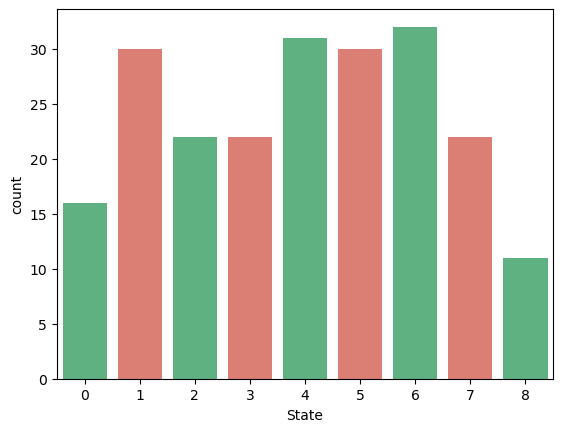

In [11]:
green = '#52BE80'
red = '#EC7063'
sns.countplot(x = df['State'], palette=[green, red])

<AxesSubplot:xlabel='Category', ylabel='count'>

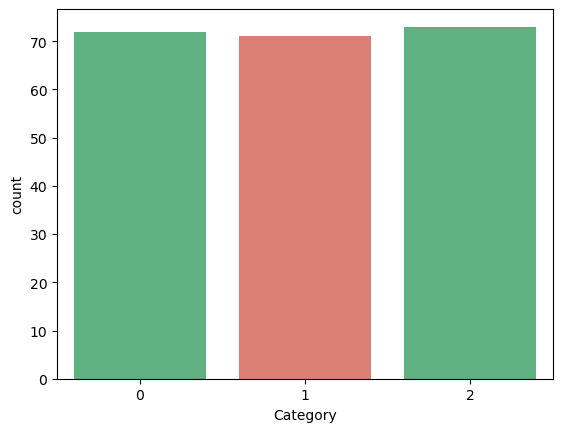

In [12]:
sns.countplot(x = df['Category'], palette=[green, red])

<AxesSubplot:xlabel='Region', ylabel='count'>

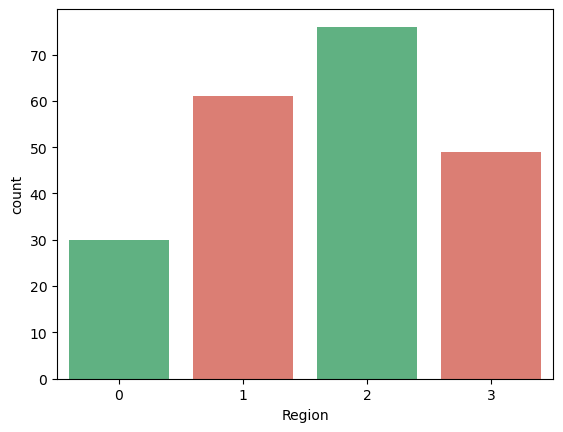

In [13]:
sns.countplot(x = df['Region'], palette=[green, red])

<AxesSubplot:xlabel='Sub_Category', ylabel='count'>

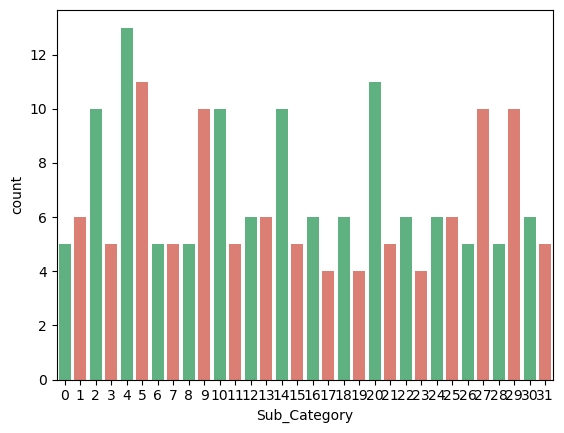

In [14]:
sns.countplot(x = df['Sub_Category'], palette=[green, red])

In [15]:
target = df['State']
df = df.drop(columns = 'State')
X_train, X_val, Y_train, Y_val = train_test_split(df, target, test_size=0.3, random_state=32)
print('Shape of train', X_train.shape)
print('Shape of Validation ', X_val.shape)

Shape of train (151, 8)
Shape of Validation  (65, 8)


In [16]:
X_train

,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit
136,30305,2,22,0,10,850,4,17.00
40,90001,3,69,1,4,300,3,6.00
114,60603,1,94,1,28,250,1,5.00
57,84104,3,111,2,7,12,4,0.36
31,84102,3,51,0,30,450,2,9.00
...,...,...,...,...,...,...,...,...
124,75206,2,99,1,29,300,1,6.00
54,60601,1,21,0,10,800,2,16.00
133,44101,1,61,1,2,600,4,12.00
43,90001,3,69,1,4,300,3,6.00


In [17]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators=700)
rfc

RandomForestClassifier(criterion='entropy', n_estimators=700)

In [18]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=700)

In [19]:
y_pred = rfc.predict(X_val)

In [20]:
f1_score(Y_val, y_pred, average='macro')

1.0

In [24]:
filemodelname = 'Sales Store'
with open(filemodelname, 'wb') as handle:
          pk.dump(filemodelname, handle, protocol=pk.HIGHEST_PROTOCOL)